<div class="alert alert-block alert-info">
    <p><img src="https://geekbrains.ru/apple-touch-icon-57x57.png" align="right" alt="GeekBrains"></p>
    <p style="color:DarkSlateGray"><b>Course:</b> Python for Data Science</p>
    <p style="color:DarkSlateGray"><b>Project:</b> Prediction of Real Estate Prices</p>
    <p style="color:DarkSlateGray"><b>Supervisor:</b> Sergey Shirkin</p>
    <p style="color:DarkSlateGray"><b>Author:</b> Dmitry Doni</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

In [2]:
# Display charts in Jupyter Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
# Display inline plots as SVG
%config InlineBackend.figure_formats = ['svg']
# Set the limit of columns displayed in the notebook
pd.options.display.max_columns = 100

### Raw Data Analysis

In [3]:
raw_data = pd.read_csv('../datasets/realestate/train.csv')
raw_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
raw_data.shape

(10000, 20)

(array([ 274.,  643., 1143., 1649., 1906., 1262.,  889.,  545.,  396.,
         335.,  251.,  186.,  148.,  106.,   87.,   67.,   43.,   29.,
          23.,   18.]),
 array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
        173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
        288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
        403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
        518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
        633233.46656995]),
 <a list of 20 Patch objects>)

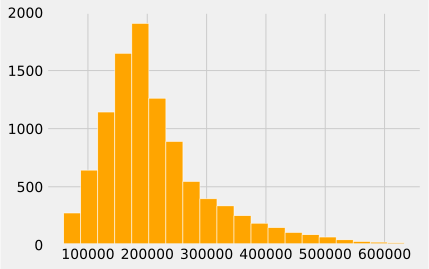

In [5]:
plt.hist(raw_data["Price"], bins=20, color="orange", ec="white")

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [7]:
raw_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Summary
As a result of Raw Data Analysis, we have found the following "dirty" data:
* Missing values in fields:
 * "LifeSquare"
 * "Healthcare_1"
* Non-numeric values in fields:
 * "Ecology_2"
 * "Ecology_3"
 * "Shops_2"
* Incorrect/inaccurate records in fields:
 * "Rooms"
 * "Square"
 * "HouseYear"
 * "Floor"
 * "HouseFloor"
 * "LifeSquare"
 * "KitchenSquare"

### Cleansing Data

In [8]:
data_cleansed = raw_data

In [9]:
# Set global variables
square_min = 15.0
square1_min = data_cleansed.query('(Rooms == 1.0)')["Square"].min()
square2_min = data_cleansed.query('(Rooms == 2.0)')["Square"].min()
square3_min = data_cleansed.query('(Rooms == 3.0)')["Square"].min()
square4_min = data_cleansed.query('(Rooms == 4.0)')["Square"].min()
square2_max = data_cleansed.query('(Rooms == 2.0)')["Square"].max()
square3_max = data_cleansed.query('(Rooms == 3.0)')["Square"].max()
square4_max = data_cleansed.query('(Rooms == 4.0)')["Square"].max()
square5_max = data_cleansed.query('(Rooms == 5.0)')["Square"].max()

#### Cleanse HouseYear

In [10]:
data_cleansed.query('HouseYear > 2020')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [11]:
# For apartments with "HouseYear" greater than 2020, we will set the mode (i.e. maximum frequency value).
houseyear_mode = data_cleansed["HouseYear"].mode()

def cleanse_houseyear(df):
    global houseyear_mode
    df.loc[(df["HouseYear"] > 2020), "HouseYear"] = houseyear_mode[0]
    return df

In [12]:
data_cleansed = cleanse_houseyear(data_cleansed)

#### Cleanse Floor, HouseFloor

In [13]:
# Let's assume that the highest building is a 40-floor building. 
# This function will process apartments with HouseFloor greater than 40, HouseFloor equal to 0, 
# and Floor greater than HouseFloor.
floor_limit = 40.0

def cleanse_floor(df):
    global floor_limit
    df.loc[((df["HouseFloor"] == 0) & (df["Floor"] > floor_limit)), "Floor"] = floor_limit
    df.loc[((df["HouseFloor"] > floor_limit) & (df["Floor"] > floor_limit)), "Floor"] = floor_limit
    df.loc[((df["HouseFloor"] == 0) & (df["Floor"] <= floor_limit)), "HouseFloor"] = df["Floor"]
    df.loc[((df["HouseFloor"] > floor_limit) & (df["Floor"] <= floor_limit)), "HouseFloor"] = df["Floor"]
    df.loc[((df["HouseFloor"] <= floor_limit) & (df["Floor"] > floor_limit)), "Floor"] = df["HouseFloor"]    
    df.loc[(df["HouseFloor"] < df["Floor"]), "HouseFloor"] = df["Floor"]  
    return df

In [14]:
data_cleansed = cleanse_floor(data_cleansed)

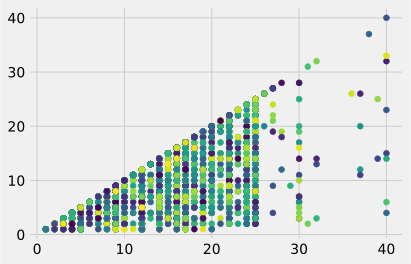

In [15]:
c = np.random.random(10000)
plt.scatter(data_cleansed["HouseFloor"], data_cleansed["Floor"], c=c)
plt.show()

#### Cleanse Rooms

In [16]:
data_cleansed["Rooms"].value_counts(normalize = False)

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [17]:
# Split dataset into folds for cross-calculating aggregated values
data_cleansed_fold1, data_cleansed_fold2 = train_test_split(data_cleansed, test_size=0.5, random_state=42)
print("Shapes:\n data_cleansed: %s, data_cleansed_fold1: %s, data_cleansed_fold2: %s" % (data_cleansed.shape, 
                                                                                         data_cleansed_fold1.shape,
                                                                                        data_cleansed_fold2.shape))

Shapes:
 data_cleansed: (10000, 20), data_cleansed_fold1: (5000, 20), data_cleansed_fold2: (5000, 20)


In [18]:
# For apartments with more than 5 rooms, we will set "Rooms" to values corresponding to 
# the 75th percentile (upper quartile) by "Square" values for 1-, 2-, 3-, 4-, and 5-room apartments.
def cleanse_rooms(df, cross_df):    
    square1_q75 = cross_df.query('(Rooms == 1.0)')["Square"].quantile(.75)
    square2_q75 = cross_df.query('(Rooms == 2.0)')["Square"].quantile(.75)
    square3_q75 = cross_df.query('(Rooms == 3.0)')["Square"].quantile(.75)
    square4_q75 = cross_df.query('(Rooms == 4.0)')["Square"].quantile(.75)
    square5_q75 = cross_df.query('(Rooms == 5.0)')["Square"].quantile(.75)
    df.loc[((df["Rooms"] > 5.0) & (df["Square"] <= square1_q75)), "Rooms"] = 1.0
    df.loc[((df["Rooms"] > 5.0) & (df["Square"] > square1_q75) & (df["Square"] <= square2_q75)), "Rooms"] = 2.0
    df.loc[((df["Rooms"] > 5.0) & (df["Square"] > square2_q75) & (df["Square"] <= square3_q75)), "Rooms"] = 3.0
    df.loc[((df["Rooms"] > 5.0) & (df["Square"] > square3_q75) & (df["Square"] <= square4_q75)), "Rooms"] = 4.0
    df.loc[((df["Rooms"] > 5.0) & (df["Square"] > square4_q75) & (df["Square"] <= square5_q75)), "Rooms"] = 5.0
    df.loc[((df["Rooms"] > 5.0) & (df["Square"] > square5_q75)), "Rooms"] = 6.0
    return df

In [19]:
data_cleansed_fold1 = cleanse_rooms(data_cleansed_fold1, data_cleansed_fold2)
data_cleansed_fold2 = cleanse_rooms(data_cleansed_fold2, data_cleansed_fold1)

In [20]:
data_cleansed = pd.concat([data_cleansed_fold1, data_cleansed_fold2], axis=0)
data_cleansed.shape

(10000, 20)

In [21]:
data_cleansed["Rooms"].value_counts(normalize = False)

2.0    3883
1.0    3706
3.0    2235
4.0     150
5.0      18
0.0       8
Name: Rooms, dtype: int64

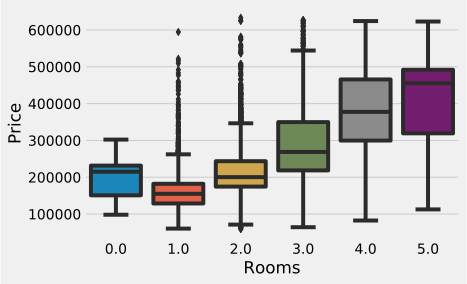

In [22]:
sns.boxplot(data_cleansed["Rooms"], data_cleansed["Price"])

#### Cleanse Square

In [23]:
# Split dataset into folds for cross-calculating aggregated values
data_cleansed_fold1, data_cleansed_fold2 = train_test_split(data_cleansed, test_size=0.5, random_state=42)
print("Shapes:\n data_cleansed: %s, data_cleansed_fold1: %s, data_cleansed_fold2: %s" % (data_cleansed.shape, 
                                                                                         data_cleansed_fold1.shape,
                                                                                        data_cleansed_fold2.shape))

Shapes:
 data_cleansed: (10000, 20), data_cleansed_fold1: (5000, 20), data_cleansed_fold2: (5000, 20)


In [24]:
# For 1-, 2-, 3-, and 4-room apartments with square greater than the largest N+1 room apartment 
# or less than the smallest N-1 room apartment, we will set "Square" to the values of the 
# 75th percentile and 25th percentile (third/first quartiles) respectively.
def cleanse_square(df, cross_df):
    global square_min, square1_min, square2_min, square3_min, square4_min
    global square2_max, square3_max, square4_max, square5_max    
    square1_q25 = cross_df.query('(Rooms == 1.0)')["Square"].quantile(.25)
    square2_q25 = cross_df.query('(Rooms == 2.0)')["Square"].quantile(.25)
    square3_q25 = cross_df.query('(Rooms == 3.0)')["Square"].quantile(.25)
    square4_q25 = cross_df.query('(Rooms == 4.0)')["Square"].quantile(.25)
    square1_q75 = cross_df.query('(Rooms == 1.0)')["Square"].quantile(.75)
    square2_q75 = cross_df.query('(Rooms == 2.0)')["Square"].quantile(.75)
    square3_q75 = cross_df.query('(Rooms == 3.0)')["Square"].quantile(.75)
    square4_q75 = cross_df.query('(Rooms == 4.0)')["Square"].quantile(.75)
    df.loc[((df["Rooms"] == 4.0) & (df["Square"] > square5_max)), "Square"] = square4_q75
    df.loc[((df["Rooms"] == 3.0) & (df["Square"] > square4_max)), "Square"] = square3_q75
    df.loc[((df["Rooms"] == 2.0) & (df["Square"] > square3_max)), "Square"] = square2_q75
    df.loc[((df["Rooms"] == 1.0) & (df["Square"] > square2_max)), "Square"] = square1_q75
    df.loc[((df["Rooms"] == 1.0) & (df["Square"] < square_min)), "Square"] = square1_q25
    df.loc[((df["Rooms"] == 2.0) & (df["Square"] < square1_min)), "Square"] = square2_q25
    df.loc[((df["Rooms"] == 3.0) & (df["Square"] < square2_min)), "Square"] = square3_q25
    df.loc[((df["Rooms"] == 4.0) & (df["Square"] < square3_min)), "Square"] = square4_q25
    return df

In [25]:
data_cleansed_fold1 = cleanse_square(data_cleansed_fold1, data_cleansed_fold2)
data_cleansed_fold2 = cleanse_square(data_cleansed_fold2, data_cleansed_fold1)

In [26]:
data_cleansed = pd.concat([data_cleansed_fold1, data_cleansed_fold2], axis=0)
data_cleansed.shape

(10000, 20)

#### Encode Ecology_2, Ecology_3, Shops_2

In [27]:
data_cleansed["Ecology_2"].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [28]:
le = preprocessing.LabelEncoder()

In [29]:
def encode_ecology(df):
    df["Ecology_2"] = le.fit_transform(df["Ecology_2"])
    df["Ecology_3"] = le.fit_transform(df["Ecology_3"])
    return df

In [30]:
def encode_shops(df):
    df["Shops_2"] = le.fit_transform(df["Shops_2"])
    return df

In [31]:
data_cleansed = encode_ecology(data_cleansed)

In [32]:
data_cleansed["Ecology_2"].value_counts()

1    9903
0      97
Name: Ecology_2, dtype: int64

In [33]:
data_cleansed = encode_shops(data_cleansed)

In [34]:
# Get price values for Class 0 (Shops_2 = 'A') and Class 1 (Shops_2 = 'B') operations
price_shops2_A = data_cleansed.loc[(data_cleansed["Shops_2"] == 0), "Price"]
price_shops2_B = data_cleansed.loc[(data_cleansed["Shops_2"] == 1), "Price"]

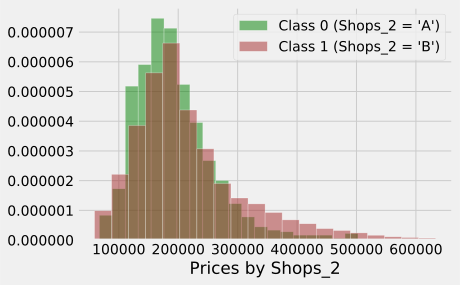

In [35]:
plt.hist(price_shops2_A, bins = 20, density = True, color="green", ec="white", alpha = 0.5, label="Class 0 (Shops_2 = 'A')")
plt.hist(price_shops2_B, bins = 20, density = True, color="brown", ec="white", alpha = 0.5, label="Class 1 (Shops_2 = 'B')")
plt.xlabel("Prices by Shops_2")
plt.legend(loc="upper right")
plt.show()

In [36]:
data_cleansed["Shops_2"].value_counts()

1    9175
0     825
Name: Shops_2, dtype: int64

#### Summary
As a result of Data Cleansing, we have made the following changes to raw data:
* Cleansed features:
 * HouseYear
 * Floor
 * HouseFloor
 * Rooms
 * Square
* Encoded features:
 * Ecology_2
 * Ecology_3
 * Shops_2

### Feature Engineering

In [37]:
train, valid = train_test_split(data_cleansed, test_size=0.2, random_state=42)

#### Add Mean Price

In [38]:
X = train
X.shape

(8000, 20)

In [39]:
# Split dataset into four folds for cross-calculating mean price
kf = KFold(n_splits=4, random_state=42)
print(kf)

KFold(n_splits=4, random_state=42, shuffle=False)


In [40]:
kfx = kf.split(X)

In [41]:
split_result = next(kfx)
train_fold1 = X.iloc[split_result[0]]
test_fold1 = X.iloc[split_result[1]]
print("Shapes:\n train_fold1: %s, test_fold1: %s" % (train_fold1.shape, test_fold1.shape))

Shapes:
 train_fold1: (6000, 20), test_fold1: (2000, 20)


In [42]:
split_result = next(kfx)
train_fold2 = X.iloc[split_result[0]]
test_fold2 = X.iloc[split_result[1]]
print("Shapes:\n train_fold2: %s, test_fold2: %s" % (train_fold2.shape, test_fold2.shape))

Shapes:
 train_fold2: (6000, 20), test_fold2: (2000, 20)


In [43]:
split_result = next(kfx)
train_fold3 = X.iloc[split_result[0]]
test_fold3 = X.iloc[split_result[1]]
print("Shapes:\n train_fold3: %s, test_fold3: %s" % (train_fold3.shape, test_fold3.shape))

Shapes:
 train_fold3: (6000, 20), test_fold3: (2000, 20)


In [44]:
split_result = next(kfx)
train_fold4 = X.iloc[split_result[0]]
test_fold4 = X.iloc[split_result[1]]
print("Shapes:\n train_fold4: %s, test_fold4: %s" % (train_fold4.shape, test_fold4.shape))

Shapes:
 train_fold4: (6000, 20), test_fold4: (2000, 20)


In [45]:
mean_price_by_district_rooms_f1 = train_fold1.groupby(["DistrictId", "Rooms"], as_index=False)[["Price"]].mean().\
    rename(columns={"Price":"mean_price"})
mean_price_by_district_rooms_f1.head()

,DistrictId,Rooms,mean_price
0,0,1.0,157670.544497
1,0,2.0,189297.224564
2,0,3.0,283744.403395
3,1,1.0,149672.773534
4,1,2.0,198317.905320


In [46]:
mean_price_by_district_rooms_f2 = train_fold2.groupby(["DistrictId", "Rooms"], as_index=False)[["Price"]].mean().\
    rename(columns={"Price":"mean_price"})
mean_price_by_district_rooms_f2.head()

,DistrictId,Rooms,mean_price
0,0,1.0,137267.571702
1,0,2.0,216106.300657
2,0,3.0,332733.465155
3,1,1.0,147492.034853
4,1,2.0,199830.892898


In [47]:
mean_price_by_district_rooms_f3 = train_fold3.groupby(["DistrictId", "Rooms"], as_index=False)[["Price"]].mean().\
    rename(columns={"Price":"mean_price"})
mean_price_by_district_rooms_f3.head()

,DistrictId,Rooms,mean_price
0,0,1.0,146395.443700
1,0,2.0,200186.461063
2,0,3.0,325382.871488
3,1,1.0,148877.574574
4,1,2.0,198341.896156


In [48]:
mean_price_by_district_rooms_f4 = train_fold4.groupby(["DistrictId", "Rooms"], as_index=False)[["Price"]].mean().\
    rename(columns={"Price":"mean_price"})
mean_price_by_district_rooms_f4.head()

,DistrictId,Rooms,mean_price
0,0,1.0,146332.120041
1,0,2.0,201665.842665
2,0,3.0,342859.118577
3,1,1.0,149011.158991
4,1,2.0,199047.311931


In [49]:
mean_price_by_rooms_f1 = train_fold1.groupby("Rooms", as_index=False)[["Price"]].mean().\
    rename(columns={"Price":"mean_price_by_rooms"})
mean_price_by_rooms_f1

,Rooms,mean_price_by_rooms
0,0.0,181043.641625
1,1.0,159948.896398
2,2.0,214349.951411
3,3.0,289449.919907
4,4.0,396906.530861
5,5.0,460526.346414


In [50]:
mean_price_by_rooms_f2 = train_fold2.groupby("Rooms", as_index=False)[["Price"]].mean().\
    rename(columns={"Price":"mean_price_by_rooms"})
mean_price_by_rooms_f2

,Rooms,mean_price_by_rooms
0,0.0,202618.828433
1,1.0,160400.279644
2,2.0,214749.684310
3,3.0,289783.929117
4,4.0,393270.326470
5,5.0,457355.463201


In [51]:
mean_price_by_rooms_f3 = train_fold3.groupby("Rooms", as_index=False)[["Price"]].mean().\
    rename(columns={"Price":"mean_price_by_rooms"})
mean_price_by_rooms_f3

,Rooms,mean_price_by_rooms
0,0.0,209980.134971
1,1.0,160173.184449
2,2.0,212145.288787
3,3.0,287322.590037
4,4.0,376180.641728
5,5.0,396949.527835


In [52]:
mean_price_by_rooms_f4 = train_fold4.groupby("Rooms", as_index=False)[["Price"]].mean().\
    rename(columns={"Price":"mean_price_by_rooms"})
mean_price_by_rooms_f4

,Rooms,mean_price_by_rooms
0,0.0,198068.250232
1,1.0,158923.643478
2,2.0,214940.662267
3,3.0,289309.635942
4,4.0,365473.598363
5,5.0,460169.171608


In [53]:
# Global mean price for each fold
mean_price_global_f1 = train_fold1["Price"].mean()
mean_price_global_f2 = train_fold2["Price"].mean()
mean_price_global_f3 = train_fold3["Price"].mean()
mean_price_global_f4 = train_fold4["Price"].mean()
mean_price_global_f1, mean_price_global_f2, mean_price_global_f3, mean_price_global_f4

(214647.13753737183,
 214414.17959424268,
 212263.57830889185,
 212288.31508399599)

In [54]:
def add_mean_price(df, mean_price_by_district_rooms, mean_price_by_rooms, mean_price_global):
    df = pd.merge(df, mean_price_by_rooms, on="Rooms", how='left')
    df["mean_price_by_rooms"] = df["mean_price_by_rooms"].fillna(mean_price_global)
    df = pd.merge(df, mean_price_by_district_rooms, on=["DistrictId", "Rooms"], how='left')
    df["mean_price"] = df["mean_price"].fillna(mean_price_global)
    df = df.drop("mean_price_by_rooms", axis=1)
    return df

In [55]:
test_fold1 = add_mean_price(test_fold1, mean_price_by_district_rooms_f1, mean_price_by_rooms_f1, mean_price_global_f1)
test_fold2 = add_mean_price(test_fold2, mean_price_by_district_rooms_f2, mean_price_by_rooms_f2, mean_price_global_f2)
test_fold3 = add_mean_price(test_fold3, mean_price_by_district_rooms_f3, mean_price_by_rooms_f3, mean_price_global_f3)
test_fold4 = add_mean_price(test_fold4, mean_price_by_district_rooms_f4, mean_price_by_rooms_f4, mean_price_global_f4)

In [56]:
train = pd.concat([test_fold1, test_fold2, test_fold3, test_fold4], axis=0)
train.shape

(8000, 21)

In [57]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mean_price
count,8000.000000,8000.000000,8000.000000,8000.000000,6315.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,4158.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,8370.769250,50.346750,1.882500,56.061115,37.452002,6.378000,8.507000,13.411500,1984.90375,0.118930,0.990375,0.971750,24.846625,5381.588750,8.011875,1143.392977,1.334250,4.245875,0.918250,213403.302631,210487.213221
std,4863.502922,43.498759,0.811804,19.242195,95.935864,31.830909,5.242675,5.841013,18.35020,0.118885,0.097640,0.165697,17.633455,4026.913733,23.714279,1028.929575,1.501269,4.806486,0.274001,92522.008133,71281.745895
min,0.000000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,1.000000,1910.00000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,66421.736691
25%,4130.000000,20.000000,1.000000,41.728633,22.808906,1.000000,4.000000,9.000000,1974.00000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153033.150844,164456.862482
50%,8384.500000,35.000000,2.000000,52.405784,32.734158,6.000000,7.000000,14.000000,1977.00000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,191305.010171,197726.059478
75%,12582.250000,75.000000,2.000000,65.803715,45.072759,9.000000,12.000000,17.000000,2001.00000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,247867.776821,246151.585456
max,16798.000000,209.000000,5.000000,409.425181,7480.592129,2014.000000,40.000000,40.000000,2020.00000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,620399.280325


In [58]:
mean_price_by_district_rooms = train.groupby(["DistrictId", "Rooms"], as_index=False)[["Price"]].mean().\
    rename(columns={"Price":"mean_price"})
mean_price_by_district_rooms.head()

,DistrictId,Rooms,mean_price
0,0,1.0,146226.835066
1,0,2.0,200186.461063
2,0,3.0,320451.787692
3,1,1.0,148763.890775
4,1,2.0,198897.890128


In [59]:
mean_price_by_rooms = train.groupby("Rooms", as_index=False)[["Price"]].mean().\
    rename(columns={"Price":"mean_price_by_rooms"})
mean_price_by_rooms

,Rooms,mean_price_by_rooms
0,0.0,198068.250232
1,1.0,159856.481159
2,2.0,214045.015998
3,3.0,288965.529590
4,4.0,383607.346639
5,5.0,448950.193868


In [60]:
mean_price_global = train["Price"].mean()

In [61]:
valid = add_mean_price(valid, mean_price_by_district_rooms, mean_price_by_rooms, mean_price_global)

In [62]:
valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mean_price
count,2000.000000,2000.000000,2000.00000,2000.000000,1572.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,1044.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,8433.961500,50.617000,1.90350,56.969878,36.185881,5.854500,8.604500,13.328500,1984.70400,0.118567,0.990000,0.975500,24.04850,5234.432000,8.148500,1140.958812,1.260500,4.173000,0.914500,217081.076469,211680.536672
std,4841.924804,43.951407,0.81702,20.056511,18.511990,5.069041,5.229412,5.873997,18.65096,0.119614,0.099524,0.154634,17.11276,3924.097656,24.302279,991.926223,1.461406,4.806519,0.279694,94226.391753,70674.095737
min,10.000000,0.000000,0.00000,16.547242,0.641822,0.000000,1.000000,1.000000,1914.00000,0.000000,0.000000,0.000000,0.00000,168.000000,0.000000,30.000000,0.000000,0.000000,0.000000,64927.358711,69623.753191
25%,4290.750000,20.750000,1.00000,42.005358,22.678582,1.000000,4.000000,9.000000,1974.00000,0.015017,1.000000,1.000000,6.00000,1564.000000,0.000000,520.000000,0.000000,1.000000,1.000000,156512.965550,165604.898785
50%,8421.000000,37.000000,2.00000,53.214913,32.916376,6.000000,8.000000,14.000000,1977.00000,0.072158,1.000000,1.000000,24.50000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,194557.851624,198897.890128
75%,12646.000000,75.000000,2.00000,66.446628,45.329242,9.000000,12.000000,17.000000,2001.00000,0.195781,1.000000,1.000000,35.00000,7077.000000,4.250000,1548.000000,2.000000,5.000000,1.000000,255876.182014,248340.785874
max,16797.000000,208.000000,5.00000,275.645284,233.949309,96.000000,37.000000,40.000000,2020.00000,0.521867,1.000000,1.000000,74.00000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,624549.354546,600903.828562


In [63]:
# Features to be used in models
features = ["Square", 
            "Rooms", 
            "HouseYear", 
            "Ecology_1", 
            "Ecology_2", 
            "Ecology_3",
            "Social_1",
            "Social_2",
            "Social_3",
            "Shops_1", 
            "Shops_2", 
            "Floor",
            "HouseFloor",
            "mean_price"]

#### Summary
As a result of Feature Engineering, we have added the following new features:
* mean_price

### Machine Learning

#### Linear Regression Model

In [64]:
lr_price = LR()
lr_price.fit(train.loc[:, features], train["Price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
y_pred_train = lr_price.predict(train.loc[:, features])
y_pred_train

array([352216.40295279, 267021.66896221, 236183.10582319, ...,
       348866.81042919, 194055.39697247, 285759.65326607])

In [66]:
r2_train_lr = r2_score(train["Price"], y_pred_train)
r2_train_lr

0.588236037023332

In [67]:
y_pred_valid = lr_price.predict(valid.loc[:, features])

In [68]:
r2_valid_lr = r2_score(valid["Price"], y_pred_valid)
r2_valid_lr

0.6140156570999666

#### Random Forest Regressor Model

In [69]:
def evaluate_model(model, train, valid, metric, features, target, max_depth):
    model = model(max_depth=max_depth)
    model.fit(train.loc[:, features], train[target])
    y_pred_train = model.predict(train.loc[:, features])
    y_pred_valid = model.predict(valid.loc[:, features])
    metric_train = metric(train[target], y_pred_train)
    metric_valid = metric(valid[target], y_pred_valid)
    return metric_train, metric_valid

In [70]:
def check_param(min_value, max_value, model, train=train, valid=valid, metric=r2_score, features=features, 
                             target="Price"):
    max_depth_arr = []
    metric_train_arr = []
    metric_valid_arr = []

    for i in range(min_value, max_value+1):
        res = evaluate_model(model, train, valid, metric, features, 
                             target, max_depth=i)
        max_depth_arr.append(i)
        metric_train_arr.append(res[0])
        metric_valid_arr.append(res[1])
    return max_depth_arr, metric_train_arr, metric_valid_arr

In [71]:
max_depth_arr, metric_train_arr, metric_valid_arr = check_param(min_value=1, max_value=14, model=RFR)

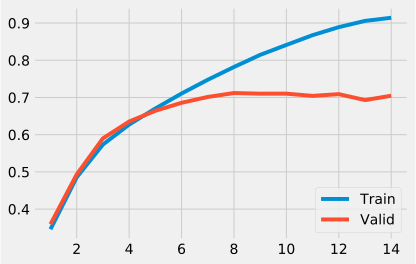

In [72]:
plt.plot(max_depth_arr, metric_train_arr, label="Train")
plt.plot(max_depth_arr, metric_valid_arr, label="Valid")
plt.legend(loc="lower right")

In [73]:
np.max(metric_valid_arr)

0.7119277507530486

In [74]:
rfr_price = RFR(n_estimators = 1000, max_depth = 8, random_state = 42)

In [75]:
rfr_price.fit(train.loc[:, features], train["Price"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [76]:
# Get predicted values
y_pred_rfr = rfr_price.predict(valid.loc[:, features])
y_pred_rfr.shape

(2000,)

In [77]:
# Compare predicted values with test values
check_test_rfr = pd.DataFrame({
    "y_pred_rfr": y_pred_rfr.flatten(),
    "y_valid": valid["Price"],
})

check_test_rfr.head()

,y_pred_rfr,y_valid
0,176061.002732,185162.630590
1,175455.127713,250690.485361
2,315196.487979,287707.984739
3,168211.231983,124761.832592
4,437285.208658,441040.663971


In [78]:
# Calculate R^2 (coefficient of determination) regression score
r2_rfr = r2_score(valid["Price"], y_pred_rfr)
r2_rfr

0.715449647319956

#### Summary
As a result of Machine Learning, we have applied the following models to train data:
* LinearRegression
* RandomForestRegressor

### Test Data Analysis

In [79]:
raw_test = pd.read_csv('../datasets/realestate/test.csv')
raw_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [80]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


### Cleansing Test Data

In [81]:
test_cleansed = raw_test

#### Cleanse HouseYear

In [82]:
test_cleansed = cleanse_houseyear(test_cleansed)

#### Cleanse Floor, HouseFloor

In [83]:
test_cleansed = cleanse_floor(test_cleansed)

#### Cleanse Rooms

In [84]:
test_cleansed = cleanse_rooms(test_cleansed, data_cleansed)
test_cleansed["Rooms"].value_counts(normalize = False)

2.0    2031
1.0    1769
3.0    1099
4.0      90
5.0       8
0.0       2
6.0       1
Name: Rooms, dtype: int64

#### Cleanse Square

In [85]:
test_cleansed = cleanse_square(test_cleansed, data_cleansed)

#### Encode Ecology_2, Ecology_3, Shops_2

In [86]:
test_cleansed = encode_ecology(test_cleansed)

In [87]:
test_cleansed = encode_shops(test_cleansed)

#### Add Mean Price

In [88]:
test_cleansed = add_mean_price(test_cleansed, mean_price_by_district_rooms, mean_price_by_rooms, mean_price_global)
test_cleansed.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,mean_price
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,1,1,11,2748,1,NaN,0,0,1,172271.978517
1,15856,74,2.0,69.263183,NaN,1.0,6.0,6.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1,237098.673884
2,5480,190,1.0,36.705076,15.948246,12.0,2.0,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,213403.302631
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,1,1,23,4583,3,NaN,3,3,1,206726.392120
4,14275,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,1,1,2,629,1,NaN,0,0,0,122723.800067


In [89]:
test_cleansed.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,mean_price
count,5000.000000,5000.000000,5000.00000,5000.000000,3959.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.90680,56.477787,36.158810,5.976800,8.61960,13.360800,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,0.917600,213210.625714
std,4832.674037,44.179466,0.81009,18.848749,17.825287,9.950018,5.39039,6.013939,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,0.275001,70990.656796
min,1.000000,0.000000,0.00000,2.900586,0.333490,0.000000,1.00000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,69623.753191
25%,4221.750000,21.000000,1.00000,41.906231,23.092026,1.000000,4.00000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,1.000000,165604.898785
50%,8320.500000,37.000000,2.00000,52.921340,32.925087,6.000000,7.00000,14.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000,198897.890128
75%,12598.250000,77.000000,2.00000,66.285129,45.174091,9.000000,12.00000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,1.000000,248052.607690
max,16795.000000,212.000000,6.00000,223.453689,303.071094,620.000000,40.00000,40.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,593618.746096


### Predictions

In [90]:
test_final = test_cleansed
test_final["Price"] = rfr_price.predict(test_final.loc[:, features]) # RFR is best model

In [91]:
test_final.loc[:, ["Id", "Price"]].to_csv('../datasets/realestate/DDoni_predictions.csv', index=None)

#### Summary
As a result of Predictions, we have applied the following model to test data:
* RandomForestRegressor

Predicted values are saved to a `*.csv` file.